# Notebook for testing performance using a subset of labelled data as training and validation sets

In [1]:
from utils import load_dataset, get_calibration_mat, get_best_match, get_location
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### Load training subset, image paths from validation subset and labels for all images

In [2]:
training = load_dataset('training_subset')
validation = load_dataset('validation_paths')
labels = load_dataset('image_labels')

### Define calibration matrix

In [3]:
# Camera's fields of view
H_FoV = 73.7
V_FoV = 53.1

# Images' width and height
W = 680
H = 490

K = get_calibration_mat(H_FoV, V_FoV, W, H)

print(K)

[[490.32196759   0.         340.        ]
 [  0.         453.66147142 245.        ]
 [  0.           0.           1.        ]]


### Pick a random image from the validation set

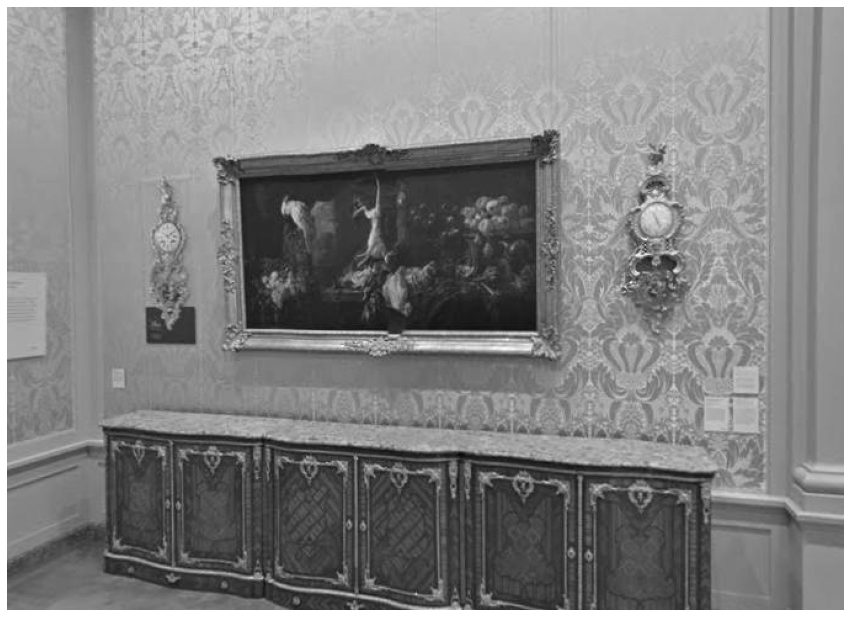

Coordinates: (66.91932192, -28.21728035)


In [4]:
r = np.random.randint(0, len(validation))

validation_image = validation[r]

# Load image
img = cv.imread(validation_image, cv.IMREAD_GRAYSCALE)

# Plot
plt.subplots(figsize = (15, 15))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

# Show image label
xq, yq = labels[validation_image[16:-4]]
print(f'Coordinates: {xq, yq}')

### Look for best SIFT match in training subset

In [5]:
best_img_name, good_matches, [kp_query, kp_match] = get_best_match(img, training)

TypeError: get_best_match() missing 1 required positional argument: 'no_feature_dataset'

### Show best match and matching points

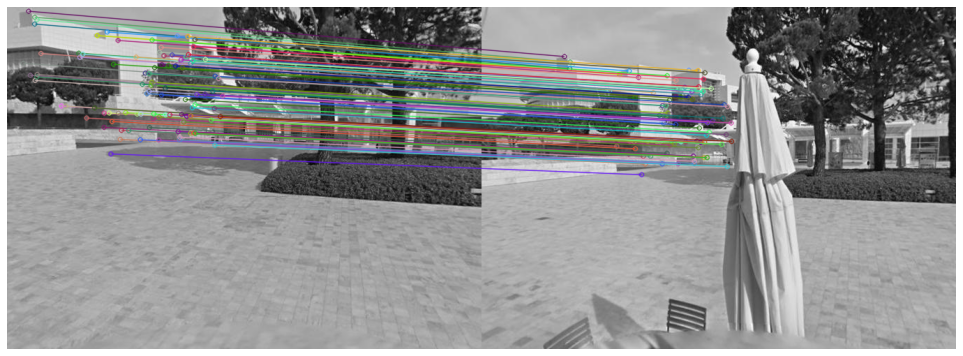

In [27]:
# Load best match image and matches
best_match_img = cv.imread('./Dataset/train/' + best_img_name + '.jpg', cv.IMREAD_GRAYSCALE)

# Get matching points for both images
pts_query = np.float32([kp_query[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
pts_match = np.float32([kp_match[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Get transformation matrix and list of succesful matches
H, status = cv.findHomography(pts_query, pts_match, cv.RANSAC, ransacReprojThreshold = 5, maxIters = 10)
success = status.ravel().tolist()
draw_params = dict(matchesMask = success, flags = 2)

# Draw matches between both images
matches_img = cv.drawMatches(img, kp_query, best_match_img, kp_match, good_matches, None, **draw_params)

# Plot
plt.subplots(figsize = (17, 17))
plt.imshow(matches_img)
plt.axis('off')
plt.show()

### Obtain translation from essential matrix

In [28]:
# Find the essential matrix for this pair of images
E, mask = cv.findEssentialMat(pts_match, pts_query, K)

# Recover relative rotation and translation from E
M, R, t, mask = cv.recoverPose(E, pts_match, pts_query, K)

# Get coordinates (label) from best match
xm, ym = labels[best_img_name]

# Check results
print(f'Best match coordinates: {xm, ym}')
print(f'True query coordinates: {xq, yq}')
print()
# print(f'Ideal results: {xm - xq, ym - yq}')
# print(f'Obtained results: {float(t[0]), float(t[1]), float(t[2])}')

Xm = np.array([[xm], [ym]])
Xq = np.matmul(np.linalg.inv(R[:2, :2]), Xm) + t[:2]

#np.array([[xq], [yq]])
#Xm = np.matmul(R[:2, :2], Xq) + t[:2]

print(f'Obtained query coordinates: {float(Xq[0]), float(Xq[1])}')
print()
print(f'Ideal difference: {xq - xm, yq - ym}')
print(f'Obtained difference: {float(Xq[0]) - xm, float(Xq[1]) - ym}')


Best match coordinates: (-130.6806781, 94.28271965)
True query coordinates: (-127.7806781, 97.48271965)

Obtained query coordinates: (-129.97735236096594, 95.65729371906971)

Ideal difference: (2.8999999999999915, 3.200000000000003)
Obtained difference: (0.7033257390340566, 1.374574069069709)


In [6]:
get_location(img, training, labels)

Image 1 of 6375. Best match so far: 0 points.
Image 2 of 6375. Best match so far: 12 points.
Image 3 of 6375. Best match so far: 12 points.
Image 4 of 6375. Best match so far: 12 points.
Image 5 of 6375. Best match so far: 13 points.
Image 6 of 6375. Best match so far: 13 points.
Image 7 of 6375. Best match so far: 13 points.
Image 8 of 6375. Best match so far: 13 points.
Image 9 of 6375. Best match so far: 13 points.
Image 10 of 6375. Best match so far: 13 points.
Image 11 of 6375. Best match so far: 13 points.
Image 12 of 6375. Best match so far: 13 points.
Image 13 of 6375. Best match so far: 13 points.
Image 14 of 6375. Best match so far: 13 points.
Image 15 of 6375. Best match so far: 13 points.
Image 16 of 6375. Best match so far: 13 points.
Image 17 of 6375. Best match so far: 13 points.
Image 18 of 6375. Best match so far: 13 points.
Image 19 of 6375. Best match so far: 13 points.
Image 20 of 6375. Best match so far: 13 points.
Image 21 of 6375. Best match so far: 13 points.
Im

Image 172 of 6375. Best match so far: 33 points.
Image 173 of 6375. Best match so far: 33 points.
Image 174 of 6375. Best match so far: 33 points.
Image 175 of 6375. Best match so far: 33 points.
Image 176 of 6375. Best match so far: 33 points.
Image 177 of 6375. Best match so far: 33 points.
Image 178 of 6375. Best match so far: 33 points.
Image 179 of 6375. Best match so far: 33 points.
Image 180 of 6375. Best match so far: 33 points.
Image 181 of 6375. Best match so far: 33 points.
Image 182 of 6375. Best match so far: 33 points.
Image 183 of 6375. Best match so far: 33 points.
Image 184 of 6375. Best match so far: 33 points.
Image 185 of 6375. Best match so far: 33 points.
Image 186 of 6375. Best match so far: 33 points.
Image 187 of 6375. Best match so far: 33 points.
Image 188 of 6375. Best match so far: 33 points.
Image 189 of 6375. Best match so far: 33 points.
Image 190 of 6375. Best match so far: 33 points.
Image 191 of 6375. Best match so far: 33 points.
Image 192 of 6375. B

Image 350 of 6375. Best match so far: 33 points.
Image 351 of 6375. Best match so far: 33 points.
Image 352 of 6375. Best match so far: 33 points.
Image 353 of 6375. Best match so far: 33 points.
Image 354 of 6375. Best match so far: 33 points.
Image 355 of 6375. Best match so far: 33 points.
Image 356 of 6375. Best match so far: 33 points.
Image 357 of 6375. Best match so far: 33 points.
Image 358 of 6375. Best match so far: 33 points.
Image 359 of 6375. Best match so far: 33 points.
Image 360 of 6375. Best match so far: 33 points.
Image 361 of 6375. Best match so far: 33 points.
Image 362 of 6375. Best match so far: 33 points.
Image 363 of 6375. Best match so far: 33 points.
Image 364 of 6375. Best match so far: 33 points.
Image 365 of 6375. Best match so far: 33 points.
Image 366 of 6375. Best match so far: 33 points.
Image 367 of 6375. Best match so far: 33 points.
Image 368 of 6375. Best match so far: 33 points.
Image 369 of 6375. Best match so far: 33 points.
Image 370 of 6375. B

Image 526 of 6375. Best match so far: 55 points.
Image 527 of 6375. Best match so far: 55 points.
Image 528 of 6375. Best match so far: 55 points.
Image 529 of 6375. Best match so far: 55 points.
Image 530 of 6375. Best match so far: 55 points.
Image 531 of 6375. Best match so far: 55 points.
Image 532 of 6375. Best match so far: 55 points.
Image 533 of 6375. Best match so far: 55 points.
Image 534 of 6375. Best match so far: 55 points.
Image 535 of 6375. Best match so far: 55 points.
Image 536 of 6375. Best match so far: 55 points.
Image 537 of 6375. Best match so far: 55 points.
Image 538 of 6375. Best match so far: 55 points.
Image 539 of 6375. Best match so far: 55 points.
Image 540 of 6375. Best match so far: 55 points.
Image 541 of 6375. Best match so far: 55 points.
Image 542 of 6375. Best match so far: 55 points.
Image 543 of 6375. Best match so far: 55 points.
Image 544 of 6375. Best match so far: 55 points.
Image 545 of 6375. Best match so far: 55 points.
Image 546 of 6375. B

Image 699 of 6375. Best match so far: 55 points.
Image 700 of 6375. Best match so far: 55 points.
Image 701 of 6375. Best match so far: 55 points.
Image 702 of 6375. Best match so far: 55 points.
Image 703 of 6375. Best match so far: 55 points.
Image 704 of 6375. Best match so far: 55 points.
Image 705 of 6375. Best match so far: 55 points.
Image 706 of 6375. Best match so far: 55 points.
Image 707 of 6375. Best match so far: 55 points.
Image 708 of 6375. Best match so far: 55 points.
Image 709 of 6375. Best match so far: 55 points.
Image 710 of 6375. Best match so far: 55 points.
Image 711 of 6375. Best match so far: 55 points.
Image 712 of 6375. Best match so far: 55 points.
Image 713 of 6375. Best match so far: 55 points.
Image 714 of 6375. Best match so far: 55 points.
Image 715 of 6375. Best match so far: 55 points.
Image 716 of 6375. Best match so far: 55 points.
Image 717 of 6375. Best match so far: 55 points.
Image 718 of 6375. Best match so far: 55 points.
Image 719 of 6375. B

Image 879 of 6375. Best match so far: 55 points.
Image 880 of 6375. Best match so far: 55 points.
Image 881 of 6375. Best match so far: 55 points.
Image 882 of 6375. Best match so far: 55 points.
Image 883 of 6375. Best match so far: 55 points.
Image 884 of 6375. Best match so far: 55 points.
Image 885 of 6375. Best match so far: 55 points.
Image 886 of 6375. Best match so far: 55 points.
Image 887 of 6375. Best match so far: 55 points.
Image 888 of 6375. Best match so far: 55 points.
Image 889 of 6375. Best match so far: 55 points.
Image 890 of 6375. Best match so far: 55 points.
Image 891 of 6375. Best match so far: 55 points.
Image 892 of 6375. Best match so far: 55 points.
Image 893 of 6375. Best match so far: 55 points.
Image 894 of 6375. Best match so far: 55 points.
Image 895 of 6375. Best match so far: 55 points.
Image 896 of 6375. Best match so far: 55 points.
Image 897 of 6375. Best match so far: 55 points.
Image 898 of 6375. Best match so far: 55 points.
Image 899 of 6375. B

Image 1049 of 6375. Best match so far: 60 points.
Image 1050 of 6375. Best match so far: 60 points.
Image 1051 of 6375. Best match so far: 60 points.
Image 1052 of 6375. Best match so far: 60 points.
Image 1053 of 6375. Best match so far: 60 points.
Image 1054 of 6375. Best match so far: 60 points.
Image 1055 of 6375. Best match so far: 60 points.
Image 1056 of 6375. Best match so far: 60 points.
Image 1057 of 6375. Best match so far: 60 points.
Image 1058 of 6375. Best match so far: 60 points.
Image 1059 of 6375. Best match so far: 60 points.
Image 1060 of 6375. Best match so far: 60 points.
Image 1061 of 6375. Best match so far: 60 points.
Image 1062 of 6375. Best match so far: 60 points.
Image 1063 of 6375. Best match so far: 60 points.
Image 1064 of 6375. Best match so far: 60 points.
Image 1065 of 6375. Best match so far: 60 points.
Image 1066 of 6375. Best match so far: 60 points.
Image 1067 of 6375. Best match so far: 60 points.
Image 1068 of 6375. Best match so far: 60 points.


Image 1214 of 6375. Best match so far: 60 points.
Image 1215 of 6375. Best match so far: 60 points.
Image 1216 of 6375. Best match so far: 60 points.
Image 1217 of 6375. Best match so far: 60 points.
Image 1218 of 6375. Best match so far: 60 points.
Image 1219 of 6375. Best match so far: 60 points.
Image 1220 of 6375. Best match so far: 60 points.
Image 1221 of 6375. Best match so far: 60 points.
Image 1222 of 6375. Best match so far: 60 points.
Image 1223 of 6375. Best match so far: 60 points.
Image 1224 of 6375. Best match so far: 60 points.
Image 1225 of 6375. Best match so far: 60 points.
Image 1226 of 6375. Best match so far: 60 points.
Image 1227 of 6375. Best match so far: 60 points.
Image 1228 of 6375. Best match so far: 60 points.
Image 1229 of 6375. Best match so far: 60 points.
Image 1230 of 6375. Best match so far: 60 points.
Image 1231 of 6375. Best match so far: 60 points.
Image 1232 of 6375. Best match so far: 60 points.
Image 1233 of 6375. Best match so far: 60 points.


Image 1380 of 6375. Best match so far: 60 points.
Image 1381 of 6375. Best match so far: 60 points.
Image 1382 of 6375. Best match so far: 60 points.
Image 1383 of 6375. Best match so far: 60 points.
Image 1384 of 6375. Best match so far: 60 points.
Image 1385 of 6375. Best match so far: 60 points.
Image 1386 of 6375. Best match so far: 60 points.
Image 1387 of 6375. Best match so far: 60 points.
Image 1388 of 6375. Best match so far: 60 points.
Image 1389 of 6375. Best match so far: 60 points.
Image 1390 of 6375. Best match so far: 60 points.
Image 1391 of 6375. Best match so far: 60 points.
Image 1392 of 6375. Best match so far: 60 points.
Image 1393 of 6375. Best match so far: 60 points.
Image 1394 of 6375. Best match so far: 60 points.
Image 1395 of 6375. Best match so far: 60 points.
Image 1396 of 6375. Best match so far: 60 points.
Image 1397 of 6375. Best match so far: 60 points.
Image 1398 of 6375. Best match so far: 60 points.
Image 1399 of 6375. Best match so far: 60 points.


Image 1549 of 6375. Best match so far: 60 points.
Image 1550 of 6375. Best match so far: 60 points.
Image 1551 of 6375. Best match so far: 60 points.
Image 1552 of 6375. Best match so far: 60 points.
Image 1553 of 6375. Best match so far: 60 points.
Image 1554 of 6375. Best match so far: 60 points.
Image 1555 of 6375. Best match so far: 60 points.
Image 1556 of 6375. Best match so far: 60 points.
Image 1557 of 6375. Best match so far: 60 points.
Image 1558 of 6375. Best match so far: 60 points.
Image 1559 of 6375. Best match so far: 60 points.
Image 1560 of 6375. Best match so far: 60 points.
Image 1561 of 6375. Best match so far: 60 points.
Image 1562 of 6375. Best match so far: 60 points.
Image 1563 of 6375. Best match so far: 60 points.
Image 1564 of 6375. Best match so far: 60 points.
Image 1565 of 6375. Best match so far: 60 points.
Image 1566 of 6375. Best match so far: 60 points.
Image 1567 of 6375. Best match so far: 60 points.
Image 1568 of 6375. Best match so far: 60 points.


Image 1713 of 6375. Best match so far: 60 points.
Image 1714 of 6375. Best match so far: 60 points.
Image 1715 of 6375. Best match so far: 60 points.
Image 1716 of 6375. Best match so far: 60 points.
Image 1717 of 6375. Best match so far: 60 points.
Image 1718 of 6375. Best match so far: 60 points.
Image 1719 of 6375. Best match so far: 60 points.
Image 1720 of 6375. Best match so far: 60 points.
Image 1721 of 6375. Best match so far: 60 points.
Image 1722 of 6375. Best match so far: 60 points.
Image 1723 of 6375. Best match so far: 60 points.
Image 1724 of 6375. Best match so far: 60 points.
Image 1725 of 6375. Best match so far: 60 points.
Image 1726 of 6375. Best match so far: 60 points.
Image 1727 of 6375. Best match so far: 60 points.
Image 1728 of 6375. Best match so far: 60 points.
Image 1729 of 6375. Best match so far: 60 points.
Image 1730 of 6375. Best match so far: 60 points.
Image 1731 of 6375. Best match so far: 60 points.
Image 1732 of 6375. Best match so far: 60 points.


Image 1881 of 6375. Best match so far: 137 points.
Image 1882 of 6375. Best match so far: 137 points.
Image 1883 of 6375. Best match so far: 137 points.
Image 1884 of 6375. Best match so far: 137 points.
Image 1885 of 6375. Best match so far: 137 points.
Image 1886 of 6375. Best match so far: 137 points.
Image 1887 of 6375. Best match so far: 137 points.
Image 1888 of 6375. Best match so far: 137 points.
Image 1889 of 6375. Best match so far: 137 points.
Image 1890 of 6375. Best match so far: 137 points.
Image 1891 of 6375. Best match so far: 137 points.
Image 1892 of 6375. Best match so far: 137 points.
Image 1893 of 6375. Best match so far: 137 points.
Image 1894 of 6375. Best match so far: 137 points.
Image 1895 of 6375. Best match so far: 137 points.
Image 1896 of 6375. Best match so far: 137 points.
Image 1897 of 6375. Best match so far: 137 points.
Image 1898 of 6375. Best match so far: 137 points.
Image 1899 of 6375. Best match so far: 137 points.
Image 1900 of 6375. Best match 

Image 2043 of 6375. Best match so far: 137 points.
Image 2044 of 6375. Best match so far: 137 points.
Image 2045 of 6375. Best match so far: 137 points.
Image 2046 of 6375. Best match so far: 137 points.
Image 2047 of 6375. Best match so far: 137 points.
Image 2048 of 6375. Best match so far: 137 points.
Image 2049 of 6375. Best match so far: 137 points.
Image 2050 of 6375. Best match so far: 137 points.
Image 2051 of 6375. Best match so far: 137 points.
Image 2052 of 6375. Best match so far: 137 points.
Image 2053 of 6375. Best match so far: 137 points.
Image 2054 of 6375. Best match so far: 137 points.
Image 2055 of 6375. Best match so far: 137 points.
Image 2056 of 6375. Best match so far: 137 points.
Image 2057 of 6375. Best match so far: 137 points.
Image 2058 of 6375. Best match so far: 137 points.
Image 2059 of 6375. Best match so far: 137 points.
Image 2060 of 6375. Best match so far: 137 points.
Image 2061 of 6375. Best match so far: 137 points.
Image 2062 of 6375. Best match 

Image 2216 of 6375. Best match so far: 137 points.
Image 2217 of 6375. Best match so far: 137 points.
Image 2218 of 6375. Best match so far: 137 points.
Image 2219 of 6375. Best match so far: 137 points.
Image 2220 of 6375. Best match so far: 137 points.
Image 2221 of 6375. Best match so far: 137 points.
Image 2222 of 6375. Best match so far: 137 points.
Image 2223 of 6375. Best match so far: 137 points.
Image 2224 of 6375. Best match so far: 137 points.
Image 2225 of 6375. Best match so far: 137 points.
Image 2226 of 6375. Best match so far: 137 points.
Image 2227 of 6375. Best match so far: 137 points.
Image 2228 of 6375. Best match so far: 137 points.
Image 2229 of 6375. Best match so far: 137 points.
Image 2230 of 6375. Best match so far: 137 points.
Image 2231 of 6375. Best match so far: 137 points.
Image 2232 of 6375. Best match so far: 137 points.
Image 2233 of 6375. Best match so far: 137 points.
Image 2234 of 6375. Best match so far: 137 points.
Image 2235 of 6375. Best match 

Image 2383 of 6375. Best match so far: 137 points.
Image 2384 of 6375. Best match so far: 137 points.
Image 2385 of 6375. Best match so far: 137 points.
Image 2386 of 6375. Best match so far: 137 points.
Image 2387 of 6375. Best match so far: 137 points.
Image 2388 of 6375. Best match so far: 137 points.
Image 2389 of 6375. Best match so far: 137 points.
Image 2390 of 6375. Best match so far: 137 points.
Image 2391 of 6375. Best match so far: 137 points.
Image 2392 of 6375. Best match so far: 137 points.
Image 2393 of 6375. Best match so far: 137 points.
Image 2394 of 6375. Best match so far: 137 points.
Image 2395 of 6375. Best match so far: 137 points.
Image 2396 of 6375. Best match so far: 137 points.
Image 2397 of 6375. Best match so far: 137 points.
Image 2398 of 6375. Best match so far: 137 points.
Image 2399 of 6375. Best match so far: 137 points.
Image 2400 of 6375. Best match so far: 137 points.
Image 2401 of 6375. Best match so far: 137 points.
Image 2402 of 6375. Best match 

Image 2552 of 6375. Best match so far: 137 points.
Image 2553 of 6375. Best match so far: 137 points.
Image 2554 of 6375. Best match so far: 137 points.
Image 2555 of 6375. Best match so far: 137 points.
Image 2556 of 6375. Best match so far: 137 points.
Image 2557 of 6375. Best match so far: 137 points.
Image 2558 of 6375. Best match so far: 137 points.
Image 2559 of 6375. Best match so far: 137 points.
Image 2560 of 6375. Best match so far: 137 points.
Image 2561 of 6375. Best match so far: 137 points.
Image 2562 of 6375. Best match so far: 137 points.
Image 2563 of 6375. Best match so far: 137 points.
Image 2564 of 6375. Best match so far: 137 points.
Image 2565 of 6375. Best match so far: 137 points.
Image 2566 of 6375. Best match so far: 137 points.
Image 2567 of 6375. Best match so far: 137 points.
Image 2568 of 6375. Best match so far: 137 points.
Image 2569 of 6375. Best match so far: 137 points.
Image 2570 of 6375. Best match so far: 137 points.
Image 2571 of 6375. Best match 

Image 2722 of 6375. Best match so far: 137 points.
Image 2723 of 6375. Best match so far: 137 points.
Image 2724 of 6375. Best match so far: 137 points.
Image 2725 of 6375. Best match so far: 137 points.
Image 2726 of 6375. Best match so far: 137 points.
Image 2727 of 6375. Best match so far: 137 points.
Image 2728 of 6375. Best match so far: 137 points.
Image 2729 of 6375. Best match so far: 137 points.
Image 2730 of 6375. Best match so far: 137 points.
Image 2731 of 6375. Best match so far: 137 points.
Image 2732 of 6375. Best match so far: 137 points.
Image 2733 of 6375. Best match so far: 137 points.
Image 2734 of 6375. Best match so far: 137 points.
Image 2735 of 6375. Best match so far: 137 points.
Image 2736 of 6375. Best match so far: 137 points.
Image 2737 of 6375. Best match so far: 137 points.
Image 2738 of 6375. Best match so far: 137 points.
Image 2739 of 6375. Best match so far: 137 points.
Image 2740 of 6375. Best match so far: 137 points.
Image 2741 of 6375. Best match 

Image 2886 of 6375. Best match so far: 137 points.
Image 2887 of 6375. Best match so far: 137 points.
Image 2888 of 6375. Best match so far: 137 points.
Image 2889 of 6375. Best match so far: 137 points.
Image 2890 of 6375. Best match so far: 137 points.
Image 2891 of 6375. Best match so far: 137 points.
Image 2892 of 6375. Best match so far: 137 points.
Image 2893 of 6375. Best match so far: 137 points.
Image 2894 of 6375. Best match so far: 137 points.
Image 2895 of 6375. Best match so far: 137 points.
Image 2896 of 6375. Best match so far: 137 points.
Image 2897 of 6375. Best match so far: 137 points.
Image 2898 of 6375. Best match so far: 137 points.
Image 2899 of 6375. Best match so far: 137 points.
Image 2900 of 6375. Best match so far: 137 points.
Image 2901 of 6375. Best match so far: 137 points.
Image 2902 of 6375. Best match so far: 137 points.
Image 2903 of 6375. Best match so far: 137 points.
Image 2904 of 6375. Best match so far: 137 points.
Image 2905 of 6375. Best match 

Image 3049 of 6375. Best match so far: 137 points.
Image 3050 of 6375. Best match so far: 137 points.
Image 3051 of 6375. Best match so far: 137 points.
Image 3052 of 6375. Best match so far: 137 points.
Image 3053 of 6375. Best match so far: 137 points.
Image 3054 of 6375. Best match so far: 137 points.
Image 3055 of 6375. Best match so far: 137 points.
Image 3056 of 6375. Best match so far: 137 points.
Image 3057 of 6375. Best match so far: 137 points.
Image 3058 of 6375. Best match so far: 137 points.
Image 3059 of 6375. Best match so far: 137 points.
Image 3060 of 6375. Best match so far: 137 points.
Image 3061 of 6375. Best match so far: 137 points.
Image 3062 of 6375. Best match so far: 137 points.
Image 3063 of 6375. Best match so far: 137 points.
Image 3064 of 6375. Best match so far: 137 points.
Image 3065 of 6375. Best match so far: 137 points.
Image 3066 of 6375. Best match so far: 137 points.
Image 3067 of 6375. Best match so far: 137 points.
Image 3068 of 6375. Best match 

Image 3215 of 6375. Best match so far: 137 points.
Image 3216 of 6375. Best match so far: 137 points.
Image 3217 of 6375. Best match so far: 137 points.
Image 3218 of 6375. Best match so far: 137 points.
Image 3219 of 6375. Best match so far: 137 points.
Image 3220 of 6375. Best match so far: 137 points.
Image 3221 of 6375. Best match so far: 137 points.
Image 3222 of 6375. Best match so far: 137 points.
Image 3223 of 6375. Best match so far: 137 points.
Image 3224 of 6375. Best match so far: 137 points.
Image 3225 of 6375. Best match so far: 137 points.
Image 3226 of 6375. Best match so far: 137 points.
Image 3227 of 6375. Best match so far: 137 points.
Image 3228 of 6375. Best match so far: 137 points.
Image 3229 of 6375. Best match so far: 137 points.
Image 3230 of 6375. Best match so far: 137 points.
Image 3231 of 6375. Best match so far: 137 points.
Image 3232 of 6375. Best match so far: 137 points.
Image 3233 of 6375. Best match so far: 137 points.
Image 3234 of 6375. Best match 

Image 3376 of 6375. Best match so far: 137 points.
Image 3377 of 6375. Best match so far: 137 points.
Image 3378 of 6375. Best match so far: 137 points.
Image 3379 of 6375. Best match so far: 137 points.
Image 3380 of 6375. Best match so far: 137 points.
Image 3381 of 6375. Best match so far: 137 points.
Image 3382 of 6375. Best match so far: 137 points.
Image 3383 of 6375. Best match so far: 137 points.
Image 3384 of 6375. Best match so far: 137 points.
Image 3385 of 6375. Best match so far: 137 points.
Image 3386 of 6375. Best match so far: 137 points.
Image 3387 of 6375. Best match so far: 137 points.
Image 3388 of 6375. Best match so far: 137 points.
Image 3389 of 6375. Best match so far: 137 points.
Image 3390 of 6375. Best match so far: 137 points.
Image 3391 of 6375. Best match so far: 137 points.
Image 3392 of 6375. Best match so far: 137 points.
Image 3393 of 6375. Best match so far: 137 points.
Image 3394 of 6375. Best match so far: 137 points.
Image 3395 of 6375. Best match 

Image 3538 of 6375. Best match so far: 137 points.
Image 3539 of 6375. Best match so far: 137 points.
Image 3540 of 6375. Best match so far: 137 points.
Image 3541 of 6375. Best match so far: 137 points.
Image 3542 of 6375. Best match so far: 137 points.
Image 3543 of 6375. Best match so far: 137 points.
Image 3544 of 6375. Best match so far: 137 points.
Image 3545 of 6375. Best match so far: 137 points.
Image 3546 of 6375. Best match so far: 137 points.
Image 3547 of 6375. Best match so far: 137 points.
Image 3548 of 6375. Best match so far: 137 points.
Image 3549 of 6375. Best match so far: 137 points.
Image 3550 of 6375. Best match so far: 137 points.
Image 3551 of 6375. Best match so far: 137 points.
Image 3552 of 6375. Best match so far: 137 points.
Image 3553 of 6375. Best match so far: 137 points.
Image 3554 of 6375. Best match so far: 137 points.
Image 3555 of 6375. Best match so far: 137 points.
Image 3556 of 6375. Best match so far: 137 points.
Image 3557 of 6375. Best match 

Image 3708 of 6375. Best match so far: 137 points.
Image 3709 of 6375. Best match so far: 137 points.
Image 3710 of 6375. Best match so far: 137 points.
Image 3711 of 6375. Best match so far: 137 points.
Image 3712 of 6375. Best match so far: 137 points.
Image 3713 of 6375. Best match so far: 137 points.
Image 3714 of 6375. Best match so far: 137 points.
Image 3715 of 6375. Best match so far: 137 points.
Image 3716 of 6375. Best match so far: 137 points.
Image 3717 of 6375. Best match so far: 137 points.
Image 3718 of 6375. Best match so far: 137 points.
Image 3719 of 6375. Best match so far: 137 points.
Image 3720 of 6375. Best match so far: 137 points.
Image 3721 of 6375. Best match so far: 137 points.
Image 3722 of 6375. Best match so far: 137 points.
Image 3723 of 6375. Best match so far: 137 points.
Image 3724 of 6375. Best match so far: 137 points.
Image 3725 of 6375. Best match so far: 137 points.
Image 3726 of 6375. Best match so far: 137 points.
Image 3727 of 6375. Best match 

Image 3875 of 6375. Best match so far: 137 points.
Image 3876 of 6375. Best match so far: 137 points.
Image 3877 of 6375. Best match so far: 137 points.
Image 3878 of 6375. Best match so far: 137 points.
Image 3879 of 6375. Best match so far: 137 points.
Image 3880 of 6375. Best match so far: 137 points.
Image 3881 of 6375. Best match so far: 137 points.
Image 3882 of 6375. Best match so far: 137 points.
Image 3883 of 6375. Best match so far: 137 points.
Image 3884 of 6375. Best match so far: 137 points.
Image 3885 of 6375. Best match so far: 137 points.
Image 3886 of 6375. Best match so far: 137 points.
Image 3887 of 6375. Best match so far: 137 points.
Image 3888 of 6375. Best match so far: 137 points.
Image 3889 of 6375. Best match so far: 137 points.
Image 3890 of 6375. Best match so far: 137 points.
Image 3891 of 6375. Best match so far: 137 points.
Image 3892 of 6375. Best match so far: 137 points.
Image 3893 of 6375. Best match so far: 137 points.
Image 3894 of 6375. Best match 

Image 4041 of 6375. Best match so far: 137 points.
Image 4042 of 6375. Best match so far: 137 points.
Image 4043 of 6375. Best match so far: 137 points.
Image 4044 of 6375. Best match so far: 137 points.
Image 4045 of 6375. Best match so far: 137 points.
Image 4046 of 6375. Best match so far: 137 points.
Image 4047 of 6375. Best match so far: 137 points.
Image 4048 of 6375. Best match so far: 137 points.
Image 4049 of 6375. Best match so far: 137 points.
Image 4050 of 6375. Best match so far: 137 points.
Image 4051 of 6375. Best match so far: 137 points.
Image 4052 of 6375. Best match so far: 137 points.
Image 4053 of 6375. Best match so far: 137 points.
Image 4054 of 6375. Best match so far: 137 points.
Image 4055 of 6375. Best match so far: 137 points.
Image 4056 of 6375. Best match so far: 137 points.
Image 4057 of 6375. Best match so far: 137 points.
Image 4058 of 6375. Best match so far: 137 points.
Image 4059 of 6375. Best match so far: 137 points.
Image 4060 of 6375. Best match 

Image 4205 of 6375. Best match so far: 137 points.
Image 4206 of 6375. Best match so far: 137 points.
Image 4207 of 6375. Best match so far: 137 points.
Image 4208 of 6375. Best match so far: 137 points.
Image 4209 of 6375. Best match so far: 137 points.
Image 4210 of 6375. Best match so far: 137 points.
Image 4211 of 6375. Best match so far: 137 points.
Image 4212 of 6375. Best match so far: 137 points.
Image 4213 of 6375. Best match so far: 137 points.
Image 4214 of 6375. Best match so far: 137 points.
Image 4215 of 6375. Best match so far: 137 points.
Image 4216 of 6375. Best match so far: 137 points.
Image 4217 of 6375. Best match so far: 137 points.
Image 4218 of 6375. Best match so far: 137 points.
Image 4219 of 6375. Best match so far: 137 points.
Image 4220 of 6375. Best match so far: 137 points.
Image 4221 of 6375. Best match so far: 137 points.
Image 4222 of 6375. Best match so far: 137 points.
Image 4223 of 6375. Best match so far: 137 points.
Image 4224 of 6375. Best match 

Image 4368 of 6375. Best match so far: 137 points.
Image 4369 of 6375. Best match so far: 137 points.
Image 4370 of 6375. Best match so far: 137 points.
Image 4371 of 6375. Best match so far: 137 points.
Image 4372 of 6375. Best match so far: 137 points.
Image 4373 of 6375. Best match so far: 137 points.
Image 4374 of 6375. Best match so far: 137 points.
Image 4375 of 6375. Best match so far: 137 points.
Image 4376 of 6375. Best match so far: 137 points.
Image 4377 of 6375. Best match so far: 137 points.
Image 4378 of 6375. Best match so far: 137 points.
Image 4379 of 6375. Best match so far: 137 points.
Image 4380 of 6375. Best match so far: 137 points.
Image 4381 of 6375. Best match so far: 137 points.
Image 4382 of 6375. Best match so far: 137 points.
Image 4383 of 6375. Best match so far: 137 points.
Image 4384 of 6375. Best match so far: 137 points.
Image 4385 of 6375. Best match so far: 137 points.
Image 4386 of 6375. Best match so far: 137 points.
Image 4387 of 6375. Best match 

Image 4534 of 6375. Best match so far: 137 points.
Image 4535 of 6375. Best match so far: 137 points.
Image 4536 of 6375. Best match so far: 137 points.
Image 4537 of 6375. Best match so far: 137 points.
Image 4538 of 6375. Best match so far: 137 points.
Image 4539 of 6375. Best match so far: 137 points.
Image 4540 of 6375. Best match so far: 137 points.
Image 4541 of 6375. Best match so far: 137 points.
Image 4542 of 6375. Best match so far: 137 points.
Image 4543 of 6375. Best match so far: 137 points.
Image 4544 of 6375. Best match so far: 137 points.
Image 4545 of 6375. Best match so far: 137 points.
Image 4546 of 6375. Best match so far: 137 points.
Image 4547 of 6375. Best match so far: 137 points.
Image 4548 of 6375. Best match so far: 137 points.
Image 4549 of 6375. Best match so far: 137 points.
Image 4550 of 6375. Best match so far: 137 points.
Image 4551 of 6375. Best match so far: 137 points.
Image 4552 of 6375. Best match so far: 137 points.
Image 4553 of 6375. Best match 

Image 4705 of 6375. Best match so far: 137 points.
Image 4706 of 6375. Best match so far: 137 points.
Image 4707 of 6375. Best match so far: 137 points.
Image 4708 of 6375. Best match so far: 137 points.
Image 4709 of 6375. Best match so far: 137 points.
Image 4710 of 6375. Best match so far: 137 points.
Image 4711 of 6375. Best match so far: 137 points.
Image 4712 of 6375. Best match so far: 137 points.
Image 4713 of 6375. Best match so far: 137 points.
Image 4714 of 6375. Best match so far: 137 points.
Image 4715 of 6375. Best match so far: 137 points.
Image 4716 of 6375. Best match so far: 137 points.
Image 4717 of 6375. Best match so far: 137 points.
Image 4718 of 6375. Best match so far: 137 points.
Image 4719 of 6375. Best match so far: 137 points.
Image 4720 of 6375. Best match so far: 137 points.
Image 4721 of 6375. Best match so far: 137 points.
Image 4722 of 6375. Best match so far: 137 points.
Image 4723 of 6375. Best match so far: 137 points.
Image 4724 of 6375. Best match 

Image 4867 of 6375. Best match so far: 137 points.
Image 4868 of 6375. Best match so far: 137 points.
Image 4869 of 6375. Best match so far: 137 points.
Image 4870 of 6375. Best match so far: 137 points.
Image 4871 of 6375. Best match so far: 137 points.
Image 4872 of 6375. Best match so far: 137 points.
Image 4873 of 6375. Best match so far: 137 points.
Image 4874 of 6375. Best match so far: 137 points.
Image 4875 of 6375. Best match so far: 137 points.
Image 4876 of 6375. Best match so far: 137 points.
Image 4877 of 6375. Best match so far: 137 points.
Image 4878 of 6375. Best match so far: 137 points.
Image 4879 of 6375. Best match so far: 137 points.
Image 4880 of 6375. Best match so far: 137 points.
Image 4881 of 6375. Best match so far: 137 points.
Image 4882 of 6375. Best match so far: 137 points.
Image 4883 of 6375. Best match so far: 137 points.
Image 4884 of 6375. Best match so far: 137 points.
Image 4885 of 6375. Best match so far: 137 points.
Image 4886 of 6375. Best match 

Image 5029 of 6375. Best match so far: 137 points.
Image 5030 of 6375. Best match so far: 137 points.
Image 5031 of 6375. Best match so far: 137 points.
Image 5032 of 6375. Best match so far: 137 points.
Image 5033 of 6375. Best match so far: 137 points.
Image 5034 of 6375. Best match so far: 137 points.
Image 5035 of 6375. Best match so far: 137 points.
Image 5036 of 6375. Best match so far: 137 points.
Image 5037 of 6375. Best match so far: 137 points.
Image 5038 of 6375. Best match so far: 137 points.
Image 5039 of 6375. Best match so far: 137 points.
Image 5040 of 6375. Best match so far: 137 points.
Image 5041 of 6375. Best match so far: 137 points.
Image 5042 of 6375. Best match so far: 137 points.
Image 5043 of 6375. Best match so far: 137 points.
Image 5044 of 6375. Best match so far: 137 points.
Image 5045 of 6375. Best match so far: 137 points.
Image 5046 of 6375. Best match so far: 137 points.
Image 5047 of 6375. Best match so far: 137 points.
Image 5048 of 6375. Best match 

Image 5200 of 6375. Best match so far: 137 points.
Image 5201 of 6375. Best match so far: 137 points.
Image 5202 of 6375. Best match so far: 137 points.
Image 5203 of 6375. Best match so far: 137 points.
Image 5204 of 6375. Best match so far: 137 points.
Image 5205 of 6375. Best match so far: 137 points.
Image 5206 of 6375. Best match so far: 137 points.
Image 5207 of 6375. Best match so far: 137 points.
Image 5208 of 6375. Best match so far: 137 points.
Image 5209 of 6375. Best match so far: 137 points.
Image 5210 of 6375. Best match so far: 137 points.
Image 5211 of 6375. Best match so far: 137 points.
Image 5212 of 6375. Best match so far: 137 points.
Image 5213 of 6375. Best match so far: 137 points.
Image 5214 of 6375. Best match so far: 137 points.
Image 5215 of 6375. Best match so far: 137 points.
Image 5216 of 6375. Best match so far: 137 points.
Image 5217 of 6375. Best match so far: 137 points.
Image 5218 of 6375. Best match so far: 137 points.
Image 5219 of 6375. Best match 

Image 5367 of 6375. Best match so far: 137 points.
Image 5368 of 6375. Best match so far: 137 points.
Image 5369 of 6375. Best match so far: 137 points.
Image 5370 of 6375. Best match so far: 137 points.
Image 5371 of 6375. Best match so far: 137 points.
Image 5372 of 6375. Best match so far: 137 points.
Image 5373 of 6375. Best match so far: 137 points.
Image 5374 of 6375. Best match so far: 137 points.
Image 5375 of 6375. Best match so far: 137 points.
Image 5376 of 6375. Best match so far: 137 points.
Image 5377 of 6375. Best match so far: 137 points.
Image 5378 of 6375. Best match so far: 137 points.
Image 5379 of 6375. Best match so far: 137 points.
Image 5380 of 6375. Best match so far: 137 points.
Image 5381 of 6375. Best match so far: 137 points.
Image 5382 of 6375. Best match so far: 137 points.
Image 5383 of 6375. Best match so far: 137 points.
Image 5384 of 6375. Best match so far: 137 points.
Image 5385 of 6375. Best match so far: 137 points.
Image 5386 of 6375. Best match 

Image 5529 of 6375. Best match so far: 137 points.
Image 5530 of 6375. Best match so far: 137 points.
Image 5531 of 6375. Best match so far: 137 points.
Image 5532 of 6375. Best match so far: 137 points.
Image 5533 of 6375. Best match so far: 137 points.
Image 5534 of 6375. Best match so far: 137 points.
Image 5535 of 6375. Best match so far: 137 points.
Image 5536 of 6375. Best match so far: 137 points.
Image 5537 of 6375. Best match so far: 137 points.
Image 5538 of 6375. Best match so far: 137 points.
Image 5539 of 6375. Best match so far: 137 points.
Image 5540 of 6375. Best match so far: 137 points.
Image 5541 of 6375. Best match so far: 137 points.
Image 5542 of 6375. Best match so far: 137 points.
Image 5543 of 6375. Best match so far: 137 points.
Image 5544 of 6375. Best match so far: 137 points.
Image 5545 of 6375. Best match so far: 137 points.
Image 5546 of 6375. Best match so far: 137 points.
Image 5547 of 6375. Best match so far: 137 points.
Image 5548 of 6375. Best match 

Image 5697 of 6375. Best match so far: 137 points.
Image 5698 of 6375. Best match so far: 137 points.
Image 5699 of 6375. Best match so far: 137 points.
Image 5700 of 6375. Best match so far: 137 points.
Image 5701 of 6375. Best match so far: 137 points.
Image 5702 of 6375. Best match so far: 137 points.
Image 5703 of 6375. Best match so far: 137 points.
Image 5704 of 6375. Best match so far: 137 points.
Image 5705 of 6375. Best match so far: 137 points.
Image 5706 of 6375. Best match so far: 137 points.
Image 5707 of 6375. Best match so far: 137 points.
Image 5708 of 6375. Best match so far: 137 points.
Image 5709 of 6375. Best match so far: 137 points.
Image 5710 of 6375. Best match so far: 137 points.
Image 5711 of 6375. Best match so far: 137 points.
Image 5712 of 6375. Best match so far: 137 points.
Image 5713 of 6375. Best match so far: 137 points.
Image 5714 of 6375. Best match so far: 137 points.
Image 5715 of 6375. Best match so far: 137 points.
Image 5716 of 6375. Best match 

Image 5867 of 6375. Best match so far: 137 points.
Image 5868 of 6375. Best match so far: 137 points.
Image 5869 of 6375. Best match so far: 137 points.
Image 5870 of 6375. Best match so far: 137 points.
Image 5871 of 6375. Best match so far: 137 points.
Image 5872 of 6375. Best match so far: 137 points.
Image 5873 of 6375. Best match so far: 137 points.
Image 5874 of 6375. Best match so far: 137 points.
Image 5875 of 6375. Best match so far: 137 points.
Image 5876 of 6375. Best match so far: 137 points.
Image 5877 of 6375. Best match so far: 137 points.
Image 5878 of 6375. Best match so far: 137 points.
Image 5879 of 6375. Best match so far: 137 points.
Image 5880 of 6375. Best match so far: 137 points.
Image 5881 of 6375. Best match so far: 137 points.
Image 5882 of 6375. Best match so far: 137 points.
Image 5883 of 6375. Best match so far: 137 points.
Image 5884 of 6375. Best match so far: 137 points.
Image 5885 of 6375. Best match so far: 137 points.
Image 5886 of 6375. Best match 

Image 6035 of 6375. Best match so far: 137 points.
Image 6036 of 6375. Best match so far: 137 points.
Image 6037 of 6375. Best match so far: 137 points.
Image 6038 of 6375. Best match so far: 137 points.
Image 6039 of 6375. Best match so far: 137 points.
Image 6040 of 6375. Best match so far: 137 points.
Image 6041 of 6375. Best match so far: 137 points.
Image 6042 of 6375. Best match so far: 137 points.
Image 6043 of 6375. Best match so far: 137 points.
Image 6044 of 6375. Best match so far: 137 points.
Image 6045 of 6375. Best match so far: 137 points.
Image 6046 of 6375. Best match so far: 137 points.
Image 6047 of 6375. Best match so far: 137 points.
Image 6048 of 6375. Best match so far: 137 points.
Image 6049 of 6375. Best match so far: 137 points.
Image 6050 of 6375. Best match so far: 137 points.
Image 6051 of 6375. Best match so far: 137 points.
Image 6052 of 6375. Best match so far: 137 points.
Image 6053 of 6375. Best match so far: 137 points.
Image 6054 of 6375. Best match 

Image 6198 of 6375. Best match so far: 137 points.
Image 6199 of 6375. Best match so far: 137 points.
Image 6200 of 6375. Best match so far: 137 points.
Image 6201 of 6375. Best match so far: 137 points.
Image 6202 of 6375. Best match so far: 143 points.
Image 6203 of 6375. Best match so far: 143 points.
Image 6204 of 6375. Best match so far: 143 points.
Image 6205 of 6375. Best match so far: 143 points.
Image 6206 of 6375. Best match so far: 143 points.
Image 6207 of 6375. Best match so far: 143 points.
Image 6208 of 6375. Best match so far: 143 points.
Image 6209 of 6375. Best match so far: 143 points.
Image 6210 of 6375. Best match so far: 143 points.
Image 6211 of 6375. Best match so far: 143 points.
Image 6212 of 6375. Best match so far: 143 points.
Image 6213 of 6375. Best match so far: 143 points.
Image 6214 of 6375. Best match so far: 143 points.
Image 6215 of 6375. Best match so far: 143 points.
Image 6216 of 6375. Best match so far: 143 points.
Image 6217 of 6375. Best match 

Image 6369 of 6375. Best match so far: 143 points.
Image 6370 of 6375. Best match so far: 143 points.
Image 6371 of 6375. Best match so far: 143 points.
Image 6372 of 6375. Best match so far: 143 points.
Image 6373 of 6375. Best match so far: 143 points.
Image 6374 of 6375. Best match so far: 143 points.
Image 6375 of 6375. Best match so far: 143 points.


array([ 56.81932192, -16.31728035])